# Introduction to Portfolio Theory: Risk Measures #

In [80]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import norm

# Import Data
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt

In [81]:
def import_financial_data(
    ticker: str
):

    # Check the ticker for Upper Cases
    ticker = ticker if ticker.isupper() else ticker.upper()

    # Import data
    df = pd.read_csv(rf"..\stocks\{ticker}.csv")

    # Set the Index
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index)

    df_useful_data = df[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume']]

    df_useful_data = df_useful_data.rename(columns={
        "Open Price":"Open",
        "High Price":"High",
        "Low Price":"Low",
        "Close Price":"Close",
    })

    # Drop NaN's
    df_useful_data.dropna(inplace = True)

    return df_useful_data.loc["2020-01-01":]

In [82]:
# Import Data

df_amzn = import_financial_data("AMZN")
df_nvda = import_financial_data("NVDA")
df_tsla = import_financial_data("TSLA")

# Create the data we are going to use
data = pd.DataFrame()

data['AMZN'] = df_amzn['Close']
data['NVDA'] = df_nvda['Close']
data['TSLA'] = df_tsla['Close']

data

,AMZN,NVDA,TSLA
Date,,,
2020-01-02,94.9005,5.99775,28.683971
2020-01-03,93.7485,5.90175,29.533970
2020-01-06,95.1440,5.92650,30.102637
2020-01-07,95.3430,5.99825,31.270635
2020-01-08,94.5985,6.00950,32.809301
...,...,...,...
2024-10-15,187.6900,131.60000,219.570000
2024-10-16,186.8900,135.72000,221.330000
2024-10-17,187.5300,136.93000,220.890000


In [83]:
# Calculate Logarithmic Returns

log_returns = np.log(data / data.shift(1)).dropna()

log_returns

,AMZN,NVDA,TSLA
Date,,,
2020-01-03,-0.012213,-0.016135,0.029203
2020-01-06,0.014776,0.004185,0.019072
2020-01-07,0.002089,0.012034,0.038067
2020-01-08,-0.007839,0.001874,0.048033
2020-01-09,0.004788,0.010923,-0.022189
...,...,...,...
2024-10-15,0.000800,-0.047994,0.001869
2024-10-16,-0.004271,0.030827,0.007984
2024-10-17,0.003419,0.008876,-0.001990


In [84]:
# 1. Anualized Volatility (Standard Deviation)

volatility = log_returns.std() * np.sqrt(252)

print("Anualized Volatility:")
print(volatility)

Anualized Volatility:
AMZN    0.361268
NVDA    0.541250
TSLA    0.663593
dtype: float64


In [85]:
# 1.5 Anualized Variance (Standard Deviation)

variance = log_returns.var() * 252

print("Anualized Variance:")
print(variance)

Anualized Variance:
AMZN    0.130514
NVDA    0.292951
TSLA    0.440355
dtype: float64


In [86]:
# 2. Covariance Matrix
covariance = log_returns.cov() * 252  # Anualized

print("\nCovariance Matrix:")
print(covariance)


Covariance Matrix:
          AMZN      NVDA      TSLA
AMZN  0.130514  0.115348  0.105800
NVDA  0.115348  0.292951  0.176339
TSLA  0.105800  0.176339  0.440355


In [87]:
# 3. Correlations
correlations = log_returns.corr()

print("\nCorrelation Matrix:")
print(correlations)


Correlation Matrix:
          AMZN      NVDA      TSLA
AMZN  1.000000  0.589906  0.441320
NVDA  0.589906  1.000000  0.490963
TSLA  0.441320  0.490963  1.000000


In [88]:
# 4. Value at Risk

confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = log_returns.mean() + z_score * log_returns.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Anualized
print("\nAnualized Value at Risk (VaR) at 95% confidence level:")
print(VaR_95)



Anualized Value at Risk (VaR) at 95% confidence level:
AMZN   -0.585175
NVDA   -0.848535
TSLA   -1.064810
dtype: float64


In [89]:
# Download the SPY (benchmark)

benchmark = yf.download('SPY', start='2020-01-01', end='2025-01-01', interval='1d')

benchmark

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-01-02,300.291565,300.310070,298.128604,299.062200,59151200
2020-01-03,298.017639,299.154592,296.806751,296.862210,77709700
2020-01-06,299.154694,299.237881,296.122818,296.242988,55653900
2020-01-07,298.313507,299.062223,297.860559,298.581546,40496400
2020-01-08,299.903320,301.132685,298.257990,298.507552,68296000
...,...,...,...,...,...
2024-12-24,599.496582,599.536501,593.684050,594.272307,33160100
2024-12-26,599.536499,600.673034,596.286267,597.701991,41219100


In [90]:
# Calculate the benchmark returns

benchmark_rets = np.log(benchmark['Close'] / benchmark['Close'].shift(1)).dropna()

# Reindex
benchmark_rets = benchmark_rets.reindex(log_returns.index)

benchmark_rets

Ticker,SPY
Date,
2020-01-03,-0.007601
2020-01-06,0.003808
2020-01-07,-0.002816
2020-01-08,0.005315
2020-01-09,0.006758
...,...
2024-10-15,-0.007800
2024-10-16,0.004337
2024-10-17,0.000086


In [91]:
# Calculate the Excess Returns

excess_return = log_returns.subtract(benchmark_rets.squeeze(), axis=0)

excess_return

,AMZN,NVDA,TSLA
Date,,,
2020-01-03,-0.004612,-0.008534,0.036804
2020-01-06,0.010968,0.000377,0.015264
2020-01-07,0.004905,0.014850,0.040883
2020-01-08,-0.013154,-0.003441,0.042717
2020-01-09,-0.001970,0.004165,-0.028947
...,...,...,...
2024-10-15,0.008600,-0.040194,0.009669
2024-10-16,-0.008609,0.026490,0.003647
2024-10-17,0.003333,0.008790,-0.002076


In [92]:
# Now calculate the Tracking Error (which is the Std of the Excess Returns)

tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
AMZN    0.276449
NVDA    0.419300
TSLA    0.583096
dtype: float64


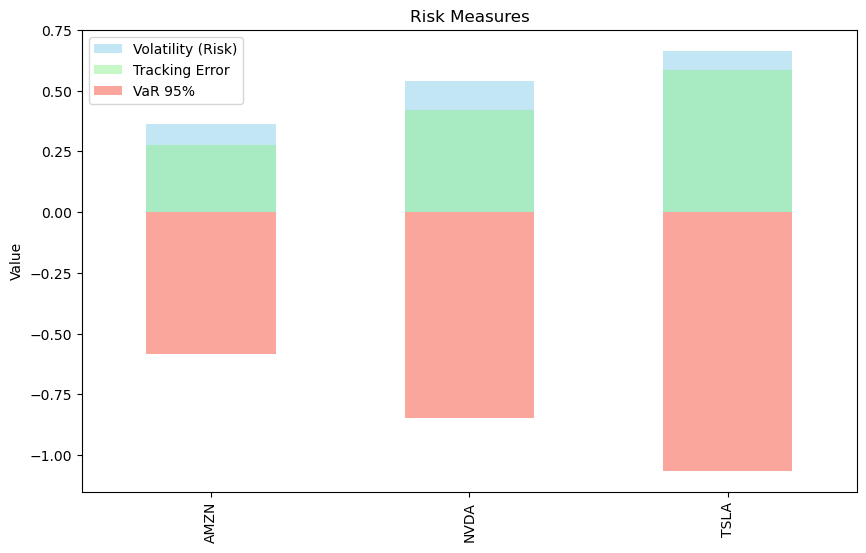

In [93]:
#Let us visualize the Risk Measures

fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [94]:
# Tesla seems more riskier than Amazon

mean = log_returns.mean() * 252

print("Anualized Mean Returns:")
print(mean)

Anualized Mean Returns:
AMZN    0.143792
NVDA    0.662629
TSLA    0.423904
dtype: float64


In [95]:
# Risk Adjusted Returns

eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
AMZN    0.398020
NVDA    1.224258
TSLA    0.638802
dtype: float64


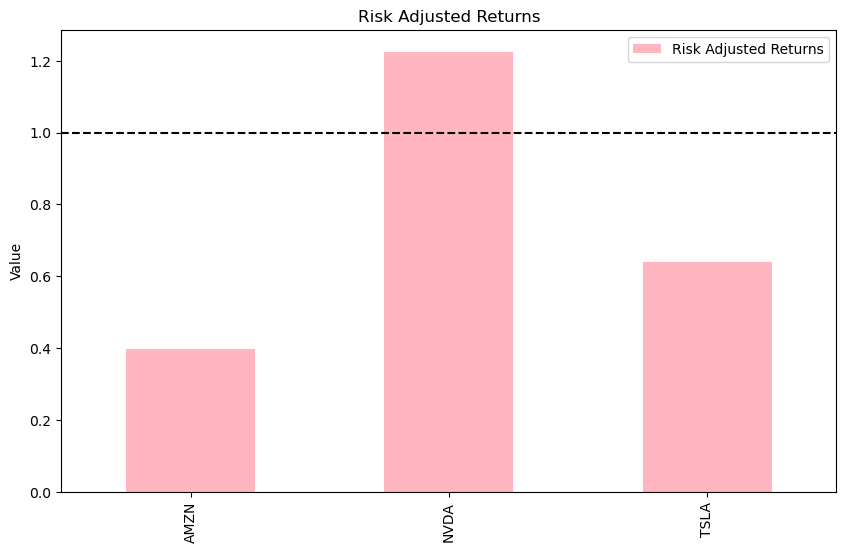

In [96]:
#Let us visualize

fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [97]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)

mean_bench = benchmark_rets.mean() * 252

var_bench = benchmark_rets.var() * 252

eff_rate_bench = mean_bench/var_bench

eff_rate_bench

Ticker
SPY    3.014465
dtype: float64